In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_ACTIONS = 3
ROCK, PAPER, SCISSORS = 0,1,2

In [3]:
def value(p1, p2):
    if p1 == p2:
        return 0
    elif (p1-1)%NUM_ACTIONS == p2:
        return 1
    else:
        return -1

In [4]:
regrets = np.zeros(NUM_ACTIONS)

In [5]:
def normalize(x):
    x = np.maximum(x, 0)
    s = np.sum(x)
    return x/s if s > 0 else np.full(3, 1/3)

In [6]:
# exploitable
opp_strat = [.4,.3,.3]

In [7]:
ITERATIONS = 1000
score = 0
scores = []
for i in range(ITERATIONS):
    strat = normalize(regrets)
    print(strat)
    a = np.random.choice(NUM_ACTIONS, p=strat)
    oa = np.random.choice(NUM_ACTIONS, p=opp_strat)
    v = value(a, oa)
    for aa in range(NUM_ACTIONS):
        regrets[aa] += value(aa, oa) - v
    score += v
    scores.append(score)

[0.33333333 0.33333333 0.33333333]
[0.66666667 0.         0.33333333]
[0.33333333 0.16666667 0.5       ]
[0.33333333 0.33333333 0.33333333]
[0.41666667 0.25       0.33333333]
[0.41666667 0.33333333 0.25      ]
[0.33333333 0.33333333 0.33333333]
[0.4        0.26666667 0.33333333]
[0.41666667 0.33333333 0.25      ]
[0.33333333 0.33333333 0.33333333]
[0.41666667 0.25       0.33333333]
[0.33333333 0.25       0.41666667]
[0.33333333 0.33333333 0.33333333]
[0.33333333 0.41666667 0.25      ]
[0.33333333 0.55555556 0.11111111]
[0.5 0.5 0. ]
[0.75 0.25 0.  ]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0.75 0.25 0.  ]
[0.6 0.4 0. ]
[0.5 0.5 0. ]
[0.42857143 0.57142857 0.        ]
[0.55555556 0.44444444 0.        ]
[0.5 0.5 0. ]
[0.6 0.4 0. ]
[0.55555556 0.44444444 0.        ]
[0.5 0.5 0. ]
[0.66666667 0.33333333 0.        ]
[0.75 0.25 0.  ]
[0.66666667 0.33333333 0.        ]
[0.72727273 0.27272727 0.        ]
[0.66666667 0.33333333 0.        ]
[0.6153

[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]


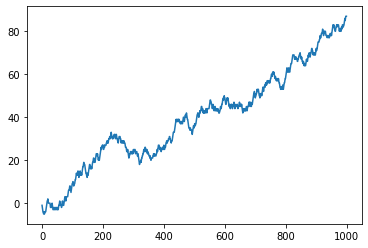

In [8]:
plt.plot(scores)
plt.show()

In [9]:
# agent vs agent
ITERATIONS, GAMES_PER_ITERATION = 10, 1000
regrets_sum_1, regrets_sum_2 = np.zeros(NUM_ACTIONS), np.zeros(NUM_ACTIONS)
strat_1, strat_2 = normalize(regrets_sum_1), normalize(regrets_sum_2)
vv = []
for i in range(ITERATIONS):
    for j in range(GAMES_PER_ITERATION):
        # get actions
        a1 = np.random.choice(NUM_ACTIONS, p=strat_1)
        a2 = np.random.choice(NUM_ACTIONS, p=strat_2)

        # get values
        v1 = value(a1, a2)
        v2 = value(a2, a1)

        # adjust regrets
        for aa in range(NUM_ACTIONS):
            regrets_sum_1[aa] += value(aa, a2) - v1
            regrets_sum_2[aa] += value(aa, a1) - v2
        vv.append(v1)
    strat_1, strat_2 = normalize(regrets_sum_1), normalize(regrets_sum_2)
    regrets_sum_1, regrets_sum_2 = np.zeros(NUM_ACTIONS), np.zeros(NUM_ACTIONS)
    print(strat_1, strat_2)

[0.65060241 0.         0.34939759] [0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333] [0.57616893 0.42383107 0.        ]
[0. 1. 0.] [0.33333333 0.33333333 0.33333333]
[0.52713178 0.         0.47286822] [0. 0. 1.]
[1. 0. 0.] [0.6116208 0.3883792 0.       ]
[0.         0.85470085 0.14529915] [0. 1. 0.]
[0. 0. 1.] [0. 0. 1.]
[1. 0. 0.] [1. 0. 0.]
[0. 1. 0.] [0. 1. 0.]
[0. 0. 1.] [0. 0. 1.]


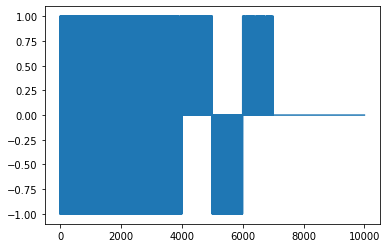

In [14]:
plt.plot(vv)
plt.show()